**<font color='blue' size = 5>Neural Networks and Deep Learning <font>**

In this Program you will use **Deep Neural Networks** to classify digits in the **mnist** dataset. This database contains a large number of handwritten digits popularly used to train various image processing systems. The training data contains images of the hand written digits and the test data contains labes (0-9) for the digits. 

**<font color='blue' size = 5>Part 1: Training and evaluating deep Neural Networks <font>**

#### As always, we will start by downloading the necessary libraries 

In [23]:
# Libaries for the deep NN
# from keras.layers import Dense

import tensorflow as tf
from tensorflow import keras


# other libraries
import matplotlib.pyplot as plt
import numpy as np

#### Load dataset

In [25]:
# Load mnist data into train and test sets
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
# Size of the datatset
print('There are ', len(X_train), ' images in the training and ', len(X_test), ' images in the test dataset')  

There are  60000  images in the training and  10000  images in the test dataset


In [17]:
# Shape of the training data
X_train[0].shape  # The images are in a 28X28 grid

(28, 28)

#### To have an idea about how the training data looks, we will print out the first instance of the training dataset

In [18]:
X_train[0]  # prints out the 1st image in the training set in grid format (28X28 matrix)
# Here 0 means black spaces/cells, 255 is white. So he closer the numbers are to 255 the brighter it gets  

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Print out what the instance looks like as an image

In [19]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

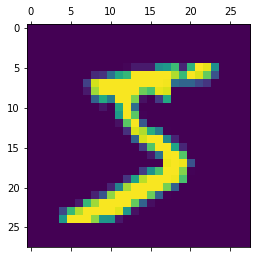

In [20]:
plt.matshow(X_train[0])  # prints out the 1st image in the training set

#### Checking the label of that instance

In [21]:
y_train[0]  # Class/label of the 1st image (the labels are 0-9)

5

### Now, let's build a simple Neural Network with no hidden layers 

In [22]:
model = keras.models.Sequential([                 # initialize the model
    keras.layers.Flatten(input_shape=(28, 28)),   # flatten the training set matrices into 1d arrays
    keras.Input(shape=(784,)),                    # input layer (shape became 784 after flattening)
    keras.layers.Dense(10, activation='sigmoid')  # output layer
])

TypeError: The added layer must be an instance of class Layer. Found: Tensor("input_1_1:0", shape=(?, 784), dtype=float32)

In [ ]:
model.summary() # gives you a summary of the model that has been built

#### Complile the model

In [ ]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#### Fit the model with X_train and y_train

In [ ]:
training_original = model.fit(X_train, y_train, batch_size=100, epochs=20) # epochs indicate the number of times the model has gone through the whole training dataset
                                                       # batch_size (default 32) is the number of training sample the model goes through at a time before updating the model

#### Test the model with X_test and y_test

In [ ]:
evaluation_original = model.evaluate(X_test, y_test, batch_size=100)

In [ ]:
accuracy_train_original = training_original.history['accuracy'][len(training_original.history['accuracy']) - 1]
loss_train_original = training_original.history['loss'][len(training_original.history['loss']) - 1]
accuracy_test_original = evaluation_original[1]
loss_test_original = evaluation_original[0]

Here, you can see that at the simplest state, with no hidden layers, the Neural Network achieves a training accuracy of around **89%** and a test accuracy of around **87%** (may vary each time). For the training set, the accuracy of the model improves with each epoch and the loss decreases.

**<font color='red' size = 4>You will do the rest of the program yourself. Follow the instructions given below to complete the assignment.</font>**

### Add hidden layers to your neural network

#### Add 2/3 hidden layers to your neural network. Set the activation functions for those layers as ReLU.
- #### Compile the new model (name it something other than 'model')
- #### Fit and evaluate the new model and record the accuracy.
- #### Compare the difference between train and test accuracies

In [ ]:
# your code here
new_model = keras.models.Sequential([               
    keras.layers.Flatten(input_shape=(28, 28)),   
    keras.Input(shape=(784,)),                    
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
    keras.layers.Dense(10, activation='selu'),
    keras.layers.Dense(20, activation='sigmoid')  
])

In [ ]:
new_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
new_training = new_model.fit(X_train, y_train, batch_size=100, epochs=20) 

In [ ]:
new_evaluation = new_model.evaluate(X_test, y_test, batch_size=100)

In [ ]:
accuracy_training = new_training.history['accuracy'][len(new_training.history['accuracy']) - 1]
loss_training = new_training.history['loss'][len(new_training.history['loss']) - 1]
accuracy_test = new_evaluation[1]
loss_test = new_evaluation[0]

#### In our own words, write how the accuracies for the new model differed from that of the previous one.
- #### Why do you think the accuracy improved/worsened?
- #### What is the importance of hidden layers in a Neural Network?

<font color='green' size = 2>Write answer here<font>

Basically, an artificial neural network consists of an input layer where it receives inputs and output layer where it outputs. The hidden layer is a layer which is hidden in between input and output layers since the output of one layer is the input of another layer. 
The hidden layers perform computations on the weighted inputs and produce net input which is then applied with activation functions to produce the actual output. The computations that the hidden layers perform (the way the hidden layers are setup) and the activation functions used depend on the type of neural network used which in turn depends on the application.



**<font color='blue' size = 5>Part 2: Avoiding Overfitting Through Regularization<font>**

#### Chapter 11 of the textbook demonstrates two methods of avoiding overfitting through regularization.
- #### ℓ2 Regularization, and
- #### Dropout
#### You will use both methods and see how the performance changes for the model.  
#### See the Avoiding Overfitting Through Regularization section of the textbook (p. 364)

In [ ]:
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

# other libraries
from functools import partial
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd

In [ ]:
# your code for implementing and evaluating l2 regularization
RegulaziedDense = partial(keras.layers.Dense,
                         kernel_initializer='he_normal',
                         kernel_regularizer=keras.regularizers.l2(0.05))

l2_model = keras.models.Sequential([               
    keras.layers.Flatten(input_shape=(28, 28)),   
    keras.Input(shape=(784,)),                    
    RegulaziedDense(30),
    RegulaziedDense(20),
    RegulaziedDense(10),
    keras.layers.Dense(10, activation='sigmoid')  
])

# Compiling new model
l2_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
training_l2 = new_model.fit(X_train, y_train, batch_size=100, epochs=20)
evaluation_l2 = new_model.evaluate(X_test, y_test, batch_size=100)

accuracy_training_l2 = training_l2.history['accuracy'][len(training_l2.history['accuracy']) - 1]
loss_training_12 = training_l2.history['loss'][len(training_l2.history['loss']) - 1]
accuracy_test_l2 = evaluation_l2[1]
loss_test_l2 = evaluation_l2[0]

In [ ]:
print("L2 Regularization\n")
print("Training of the model:\tAccuracy: " + str(round(accuracy_training_l2 * 100, 2)) + "%" + "\tLoss: " + str(round(loss_training_12 * 100, 2)) + "%\n")
print("Testing of the model:\tAccuracy: " + str(round(accuracy_test_l2 * 100, 2)) + "%\t" + "Loss: " + str(round(loss_test_l2 * 100, 2)) + "%")

In [ ]:
def model_maker(dropout=0.1):
    model = keras.models.Sequential([               
                keras.layers.Flatten(input_shape=(28, 28)),   
                keras.Input(shape=(784,)),                    
                keras.layers.Dense(500, activation='relu'),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(100, activation='relu'),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(50, activation='relu'),
                keras.layers.Dropout(dropout),
                keras.layers.Dense(10, activation='sigmoid') 
        ])
    
    model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
                  
    return model

In [ ]:
model = KerasClassifier(model_maker, dropout=0.1)
params = {'dropout': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
gs_cv = GridSearchCV(model, params, cv=4)
gs_cv.fit(X_train, y_train, epochs=20, batch_size=100)

In [ ]:
# your code for implementing and evaluating dropout
# Experiment with 2-3 different dropout rates OR
# 10 points extra credit for successfully using gridsearch to search for a good dropout rate
dropout_model = model_maker(gs_cv.best_params_['dropout'])

training_dropout = dropout_model.fit(X_train, y_train, batch_size=100, epochs=20)
evaluation_dropout = dropout_model.evaluate(X_test, y_test, batch_size=100)

accuracy_training_dropout = training_dropout.history['accuracy'][len(training_dropout.history['accuracy']) - 1]
loss_training_dropout = training_dropout.history['loss'][len(training_dropout.history['loss']) - 1]
accuracy_test_dropout = evaluation_dropout[1]
loss_test_dropout = evaluation_dropout[0]

print("Model with Dropout Regularization\n")
print("Training of the model: \tAccuracy: " + str(round(accuracy_training_dropout * 100, 2)) + "%" + 
      "\tLoss: " + str(round(loss_training_dropout * 100, 2)) + "%\n")
print("Testing the model: \tAccuracy: " + str(round(accuracy_test_dropout * 100, 2)) + "%\t" + "Loss: " + 
      str(round(loss_test_dropout * 100, 2)) + "%")

**<font color='blue' size = 5>Part 3: Convolutional Neural Networks<font>**

#### Implement a model on the same data that uses Convolutional Neural Network (CNN) to classify the digits. See the CNN Architectures section of the textbook (p. 461) for some guidance on this.
- #### Compile, fit and evaluate the model.
- #### Print a table comparinig the accuracies of each models implemented above.

In [ ]:
# code for CNN here

DefaultConv2D = partial(keras.layers.Conv2D,
                       kernel_size=3, activation='relu', padding="SAME")

cnn_model = keras.models.Sequential([
            DefaultConv2D(filters=64, kernel_size=7, input_shape=(28, 28, 1)),
            keras.layers.MaxPooling2D(pool_size=2),
            DefaultConv2D(filters=128),
            DefaultConv2D(filters=128),
            keras.layers.MaxPooling2D(pool_size=2),
            DefaultConv2D(filters=256),
            DefaultConv2D(filters=256),
            keras.layers.MaxPooling2D(pool_size=2),
            keras.layers.Flatten(),
            keras.layers.Dense(units=128, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(units=64, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(units=10, activation='softmax'),
])


cnn_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


training_cnn = cnn_model.fit(X_train, y_train, batch_size=100, epochs=20)
evaluation_cnn = cnn_model.evaluate(X_test, y_test, batch_size=100)


accuracy_training_cnn = training_cnn.history['accuracy'][len(training_cnn.history['accuracy']) - 1]
loss_training_cnn = training_cnn.history['loss'][len(training_cnn.history['loss']) - 1]
accuracy_test_cnn = evaluation_cnn[1]
loss_test_cnn = evaluation_cnn[0]

In [ ]:
print("CNN\n")
print("Training of the model: \tAccuracy: " + str(round(accuracy_training_cnn * 100, 2)) + "%" + 
      "\tLoss: " + str(round(loss_training_cnn * 100, 2)) + "%\n")
print("Testing of the model: \tAccuracy: " + str(round(accuracy_test_cnn * 100, 2)) + "%\t" + 
      "Loss: " + str(round(loss_test_cnn * 100, 2)) + "%")

- #### Comparisons:

In [ ]:
def TableConstructor(results, labels, columns):
    print("Model Result Comparison (in %):\n")
    df1 = pd.DataFrame( results,
                        index = pd.Index(labels),
                        columns = columns)
    print(df1)

In [ ]:
labels = ['Regular Model', 'Hidden Layer Model', 'L2 Reg. Model', 'Dropout Reg. Model', 'CNN']
columns = ['Training Acc.', 'Training Loss', 'Testing Acc.', 'Testing Loss']

In [ ]:
results = []
results.clear()
results.append([round(accuracy_train_original * 100 ,2), round(loss_train_original ,2), 
                round(accuracy_test_original * 100 ,2), round(loss_test_original ,2)])

results.append([round(accuracy_training * 100 ,2), round(loss_training ,2), 
                round(accuracy_test * 100 ,2), round(loss_test ,2)])

results.append([round(accuracy_training_l2 * 100 ,2), round(loss_training_12 ,2), 
                round(accuracy_test_l2 * 100 ,2), round(loss_test_l2 ,2)])

results.append([round(accuracy_training_dropout * 100 ,2), round(loss_training_dropout ,2), 
                round(accuracy_test_dropout * 100 ,2), round(loss_test_dropout ,2)])

results.append([round(accuracy_training_cnn * 100, 2), round(loss_training_cnn ,2), 
                round(accuracy_test_cnn * 100, 2), round(loss_test_cnn ,2)])


In [ ]:
TableConstructor(results, labels, columns)